<a href="https://colab.research.google.com/github/saffarizadeh/BUAN4061/blob/main/Image_Classification_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://saffarizadeh.com/Logo.png" width="300px"/>

# *BUAN 4061: Advanced Business Analytics*

# **Image Classification II**

Instructor: Dr. Kambiz Saffarizadeh

---

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Model without an activation function in the last layer

Sometimes we avoid using an activation function in the last layer to avoid some possible numerical problems in the learning process of the model (for a detailed explanation see https://xeonqq.github.io/machine%20learning/softmax/).

In [2]:
# Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test =  x_test / 255.0

# Model
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

# Compile
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train
history = model1.fit(x_train, y_train, epochs=5, validation_data=(x_test,  y_test))

# Evaluate
model1.evaluate(x_test,  y_test)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2909 - accuracy: 0.9162 - val_loss: 0.1346 - val_accuracy: 0.9590
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1410 - accuracy: 0.9583 - val_loss: 0.0948 - val_accuracy: 0.9715
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1056 - accuracy: 0.9679 - val_loss: 0.0818 - val_accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0860 - accuracy: 0.9737 - val_loss: 0.0700 - val_accuracy: 0.9769
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0678 - accuracy: 0.9792


[0.06784318387508392, 0.979200005531311]

In [3]:
model1(x_test[0:1]) # It's hard to make sense of the output

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[ -4.344841 ,  -7.363804 ,  -2.6658878,   2.398137 , -13.498876 ,
         -4.3514676, -16.226683 ,  11.654815 ,  -3.9348168,   0.982264 ]],
      dtype=float32)>

In [4]:
tf.keras.layers.Softmax()(model1(x_test[0:1])) # Softmax forces the output to be between 0 and 1 (probability)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[1.12560450e-07, 5.49878187e-09, 6.03317517e-07, 9.54605712e-05,
        1.19080084e-11, 1.11816966e-07, 7.78337518e-13, 9.99880314e-01,
        1.69612107e-07, 2.31695685e-05]], dtype=float32)>

In [5]:
# Make results human-readable by adding a Softmax layer to the model
probability_model = tf.keras.Sequential([
  model1,
  tf.keras.layers.Softmax()
])

# Use
result = probability_model(x_test[0:1])

print(result)

tf.Tensor(
[[1.12560450e-07 5.49878187e-09 6.03317517e-07 9.54605712e-05
  1.19080084e-11 1.11816966e-07 7.78337518e-13 9.99880314e-01
  1.69612107e-07 2.31695685e-05]], shape=(1, 10), dtype=float32)


# Model with an activation function in the last layer

In practice you may see many models with an activation function in the last layer. Creating a model like this saves an extra step that we needed to add after the model was trained.

In [6]:
# Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test =  x_test / 255.0

# Model
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Train
history = model1.fit(x_train, y_train, epochs=5, validation_data=(x_test,  y_test))

# Evaluate
model1.evaluate(x_test,  y_test)

# Use
model1(x_test[0:1])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3013 - accuracy: 0.9125 - val_loss: 0.1408 - val_accuracy: 0.9589
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1490 - accuracy: 0.9556 - val_loss: 0.1070 - val_accuracy: 0.9667
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1125 - accuracy: 0.9658 - val_loss: 0.0893 - val_accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0938 - accuracy: 0.9703 - val_loss: 0.0799 - val_accuracy: 0.9766
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0813 - accuracy: 0.9760


<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[1.7247583e-08, 5.4480180e-09, 5.7170018e-06, 6.2266823e-05,
        1.2601113e-12, 1.5521973e-08, 2.6535669e-13, 9.9992871e-01,
        3.6625078e-08, 3.2593232e-06]], dtype=float32)>

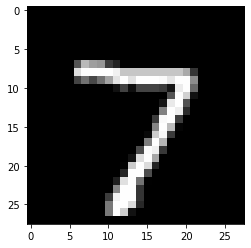

Model's prediction is 7


In [7]:
plt.imshow(x_test[0], cmap='gray')
plt.show()

print(f"Model's prediction is {np.argmax(result)}")

## Prefered method for non-sequential models

In [8]:
def create_model():
  input = tf.keras.layers.Input(shape=(28,28), dtype=tf.float32, name='input')
  l1 = tf.keras.layers.Flatten(name='flatten')(input)
  l2 = tf.keras.layers.Dense(128, activation='relu', name='first_classifier')(l1)
  l3 = tf.keras.layers.Dropout(0.2, name='dropout')(l2)
  output = tf.keras.layers.Dense(10, name='second_classifier')(l3)
  return tf.keras.Model(input, output)

In [9]:
model2 = create_model()

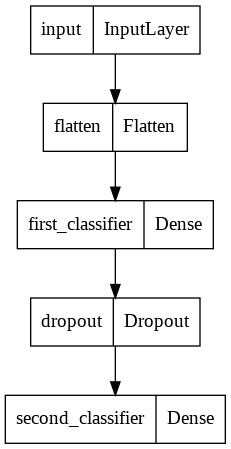

In [10]:
tf.keras.utils.plot_model(model2)

In [11]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 first_classifier (Dense)    (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 second_classifier (Dense)   (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Advanced Activation Functions

We can find activation functions under `tf.keras.activations.` and `tf.keras.layers.`

In [12]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [13]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation=tf.keras.layers.ReLU()),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [14]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU()),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

Please note the parentheses when you use `tf.keras.layers.`. You can explore the parameters that you can pass to each activation function to further customize it.

You can also explore how each activation function works by passing some numbers to it independently. See the example below. (https://www.tensorflow.org/api_docs/python/tf/keras/layers/LeakyReLU)

In [15]:
layer = tf.keras.layers.LeakyReLU()
layer([-3.0, -1.0, 0.0, 2.0])

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.90000004, -0.3       ,  0.        ,  2.        ], dtype=float32)>

In [16]:
layer = tf.keras.layers.LeakyReLU(alpha=0.1)
layer([-3.0, -1.0, 0.0, 2.0])

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.3, -0.1,  0. ,  2. ], dtype=float32)>

In [17]:
layer = tf.keras.layers.ReLU()
layer([-3.0, -1.0, 0.0, 2.0])

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 0., 0., 2.], dtype=float32)>

In [18]:
layer = tf.keras.activations.sigmoid
layer([-3.0, -1.0, 0.0, 2.0])

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.04742587, 0.26894143, 0.5       , 0.8807971 ], dtype=float32)>

In [19]:
layer = tf.keras.activations.tanh
layer([-3.0, -1.0, 0.0, 2.0])

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.9950547, -0.7615942,  0.       ,  0.9640276], dtype=float32)>

In [20]:
layer = tf.keras.layers.Softmax()
layer([-3.0, -1.0, 0.0, 2.0])

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.0056533 , 0.04177257, 0.11354961, 0.8390245 ], dtype=float32)>

## Advanced Optimizers

You can change parameters such as `learning_rate` in optimizers.

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

In [21]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)

In [22]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Advanced Loss Functions

We have already seen how you can customize the current loss functions (see https://www.tensorflow.org/api_docs/python/tf/keras/losses). Here is an example:

In [23]:
bce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [24]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])